<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Local-Binary-Pattern" data-toc-modified-id="Local-Binary-Pattern-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Local Binary Pattern</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li></ul></li><li><span><a href="#Assignment-Problem" data-toc-modified-id="Assignment-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment Problem</a></span></li></ul></div>

## Local Binary Pattern

In [1]:
# For the formatting of the jupyter-notebook
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

### Import Libraries

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Function to compute local binary equivalent for 8-neighbors
def getPixel(img, center, x, y):
    newValue = 0
    try:
        if img[x][y] >= center:
            newValue = 1
    except:
        pass
    return newValue

In [4]:
# Returns the rotated list 
def rightRotate(lists, num): 
    output_list = [] 
    for item in range(len(lists) - num, len(lists)): 
        output_list.append(lists[item]) 
         
    for item in range(0, len(lists) - num):  
        output_list.append(lists[item]) 
          
    return output_list 

In [5]:
# Compute the minimum Decimal value corresponding to rotated Binary sequence 
def minValue(valArr):
    minVal = []
    for i in np.arange(8):
        power_val = [128, 64, 32, 16, 8, 4, 2, 1]
        val = 0
        for i in range(len(valArr)):
            val += valArr[i] * power_val[i]
        minVal.append(val)
        valArr = rightRotate(valArr, 1)
    mini = np.min(minVal)
    return mini

In [6]:
### Compute Local Binary Pattern for pixel location img(x,y)
def LBPPixels(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    valArr = []
    valArr.append(getPixel(img, center, x-1, y+1))     # top_right
    valArr.append(getPixel(img, center, x, y+1))       # right
    valArr.append(getPixel(img, center, x+1, y+1))     # bottom_right
    valArr.append(getPixel(img, center, x+1, y))       # bottom
    valArr.append(getPixel(img, center, x+1, y-1))     # bottom_left
    valArr.append(getPixel(img, center, x, y-1))       # left
    valArr.append(getPixel(img, center, x-1, y-1))     # top_left
    valArr.append(getPixel(img, center, x-1, y))       # top
    
    if rotInvariant == True:
        val = minValue(valArr) 
        
    else:
        # without roation invariant
        power_val = [128, 64, 32, 16, 8, 4, 2, 1]
        val = 0
        for i in range(len(valArr)):
            val += valArr[i] * power_val[i]
 
    return val   

(1137, 1133)
112


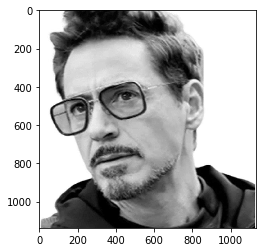

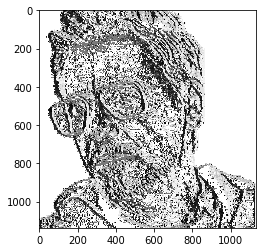

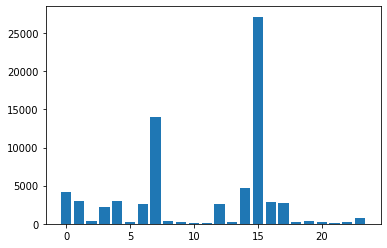

In [7]:
img = 'imgs/tonyStark.jpg'
nBins = 24   # Size of feature vector 
rotInvariant = False

imgBGR = cv2.imread(img)                              # read image
height, width, channel = imgBGR.shape                 # compute the height, width and channel of the image

imgGray = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)    # Compute grayscale image
print(imgGray.shape)

imgLBP = np.zeros((height, width), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        imgLBP[i, j] = LBPPixels(imgGray, i, j)
        if (i,j)==(200,180):
            print(imgLBP[i,j])    # print a sample value
            
hist_lbp = cv2.calcHist([imgLBP], [0], None, [nBins], [0, nBins])
output_list = []


plt.figure()
plt.imshow(imgGray,'gray')
cv2.imwrite("TonyStarkGray.jpg", imgGray) 

plt.figure()
plt.imshow(imgLBP,'gray')
cv2.imwrite("TonyStarkLBP.jpg", imgLBP) 

plt.figure()
plt.bar(np.arange(0,nBins),hist_lbp.flatten(),width=0.8)
plt.savefig('sampleFileName.pdf')
plt.show()

## Assignment Problem

In [8]:
imgGray= np.asarray([[5,4,2,2,1],
                [3,5,8,1,3],
                [2,5,4,1,2],
                [4,3,7,2,7],
                [1,4,4,2,6]])

rotInvariant = True

height, width = imgGray.shape
print(height,width)

imgLBP = np.zeros((height, width), np.float64)
for i in range(1, height-1):
    for j in range(1, width-1):
        imgLBP[i, j] = LBPPixels(imgGray, i, j)
        
print(imgLBP)    # print a sample value
            
# hist_lbp = cv2.calcHist([imgLBP], [0], None, [nBins], [0, nBins])
# output_list = []

5 5
[[  0.   0.   0.   0.   0.]
 [  0.  37.   0. 255.   0.]
 [  0.  13.  23. 255.   0.]
 [  0.  95.   0. 127.   0.]
 [  0.   0.   0.   0.   0.]]
